In [17]:
import numpy as np
import astropy.io.fits as fits
import astropy.units as u
from IPython.display import clear_output
import time
import sys
from scipy.ndimage import rotate
from scipy.interpolate import RegularGridInterpolator
import h5py
import os
from pathlib import Path

from matplotlib.patches import Circle
from importlib import reload
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from numpy import unravel_index
from photutils.aperture import CircularAperture
from photutils.aperture import ApertureStats

In [18]:
main_dir='/Users/polaris/Onedrive-UA/OneDrive - University of Arizona/Debris-Disk-Modelling/Debris-Disk-Modelling/Eps-eri-Roman_pol/Simulations_paper/Revision/HLC_band/'
dust='Astrosil/'
disk_file_dir=main_dir+dust
med_wd_noNMF_0=fits.getdata(disk_file_dir+'med_wd_I0.fits')
med_wd_noNMF_90=fits.getdata(disk_file_dir+'med_wd_I90.fits')
med_wd_noNMF_45=fits.getdata(disk_file_dir+'med_wd_I45.fits')
med_wd_noNMF_135=fits.getdata(disk_file_dir+'med_wd_I135.fits')
med_wd_noNMF_0[np.isnan(med_wd_noNMF_0)]=0
med_wd_noNMF_90[np.isnan(med_wd_noNMF_90)]=0
med_wd_noNMF_45[np.isnan(med_wd_noNMF_45)]=0
med_wd_noNMF_135[np.isnan(med_wd_noNMF_135)]=0


positions = [(34., 51.), (18., 45.),(50., 38.)]
aper = CircularAperture(positions, r=5.)

aperstats = ApertureStats(med_wd_noNMF_0, aper)
noise_noNMF_0=np.mean(aperstats.std)
SNR_0=med_wd_noNMF_0.astype(np.float64)/noise_noNMF_0

aperstats = ApertureStats(med_wd_noNMF_90, aper)
noise_noNMF_90=np.mean(aperstats.std)
SNR_90=med_wd_noNMF_90.astype(np.float64)/noise_noNMF_90

aperstats = ApertureStats(med_wd_noNMF_45, aper)
noise_noNMF_45=np.mean(aperstats.std)
SNR_45=med_wd_noNMF_45.astype(np.float64)/noise_noNMF_45

aperstats = ApertureStats(med_wd_noNMF_135, aper)
noise_noNMF_135=np.mean(aperstats.std)
SNR_135=med_wd_noNMF_135.astype(np.float64)/noise_noNMF_135



In [19]:
figure_dir='/Users/polaris/Onedrive-UA/OneDrive - University of Arizona/Debris-Disk-Modelling/Debris-Disk-Modelling/Eps-eri-Roman_pol/Simulations_paper/Revision/Figures/'

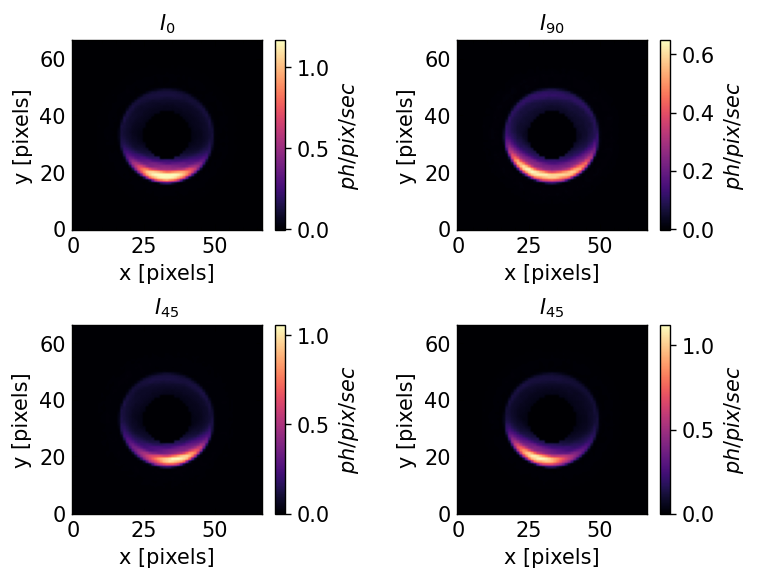

In [7]:
fig = plt.figure(dpi=125)
ax1=fig.add_subplot(221)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=12)
im1=ax1.imshow(med_wd_noNMF_0,cmap='magma')
ax1.invert_yaxis()
ax1.set_ylabel('y [pixels]',fontsize=12)
ax1.set_xlabel('x [pixels]',fontsize=12)
ax1.set_title('$I_0$',fontsize=12)
cb = fig.colorbar(im1,orientation='vertical')
cb.set_label("$ph/pix/sec$",fontsize=12)
cb.ax.tick_params(labelsize=12)

ax2=fig.add_subplot(222)
ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')
ax2.minorticks_on()
ax2.tick_params(which='both', direction='in', width=0.5, labelsize=12)
im2=ax2.imshow(med_wd_noNMF_90,cmap='magma')
ax2.invert_yaxis()
ax2.set_ylabel('y [pixels]',fontsize=12)
ax2.set_xlabel('x [pixels]',fontsize=12)
ax2.set_title('$I_{90}$',fontsize=12)
cb = fig.colorbar(im2,orientation='vertical')
cb.set_label("$ph/pix/sec$",fontsize=12)
cb.ax.tick_params(labelsize=12)
        
ax3=fig.add_subplot(223)
ax3.yaxis.set_ticks_position('both')
ax3.xaxis.set_ticks_position('both')
ax3.minorticks_on()
ax3.tick_params(which='both', direction='in', width=0.5, labelsize=12)
im3=ax3.imshow(med_wd_noNMF_45,cmap='magma')
ax3.invert_yaxis()
ax3.set_ylabel('y [pixels]',fontsize=12)
ax3.set_xlabel('x [pixels]',fontsize=12)
ax3.set_title('$I_{45}$',fontsize=12)
cb = fig.colorbar(im3,orientation='vertical')
cb.set_label("$ph/pix/sec$",fontsize=12)
cb.ax.tick_params(labelsize=12)

ax4=fig.add_subplot(224)
ax4.yaxis.set_ticks_position('both')
ax4.xaxis.set_ticks_position('both')
ax4.minorticks_on()
ax4.tick_params(which='both', direction='in', width=0.5, labelsize=12)
im4=ax4.imshow(med_wd_noNMF_135,cmap='magma')
ax4.invert_yaxis()
ax4.set_ylabel('y [pixels]',fontsize=12)
ax4.set_xlabel('x [pixels]',fontsize=12)
ax4.set_title('$I_{45}$',fontsize=12)
cb = fig.colorbar(im4,orientation='vertical')
cb.set_label("$ph/pix/sec$",fontsize=12)
cb.ax.tick_params(labelsize=12)
fig.subplots_adjust(hspace=0.5, wspace=0.4, top=0.9, right=0.95)
fig.savefig(figure_dir+'photon_counted_disks_epseri.pdf', format='pdf', bbox_inches='tight')

In [8]:
positions = [(34., 51.), (18., 45.),(50., 38.)]
aper = CircularAperture(positions, r=5.)

aperstats = ApertureStats(med_wd_noNMF_0, aper)
noise_noNMF_0=np.mean(aperstats.std)
SNR_0=med_wd_noNMF_0.astype(np.float64)/noise_noNMF_0

aperstats = ApertureStats(med_wd_noNMF_90, aper)
noise_noNMF_90=np.mean(aperstats.std)
SNR_90=med_wd_noNMF_90.astype(np.float64)/noise_noNMF_90

aperstats = ApertureStats(med_wd_noNMF_45, aper)
noise_noNMF_45=np.mean(aperstats.std)
SNR_45=med_wd_noNMF_45.astype(np.float64)/noise_noNMF_45

aperstats = ApertureStats(med_wd_noNMF_135, aper)
noise_noNMF_135=np.mean(aperstats.std)
SNR_135=med_wd_noNMF_135.astype(np.float64)/noise_noNMF_135

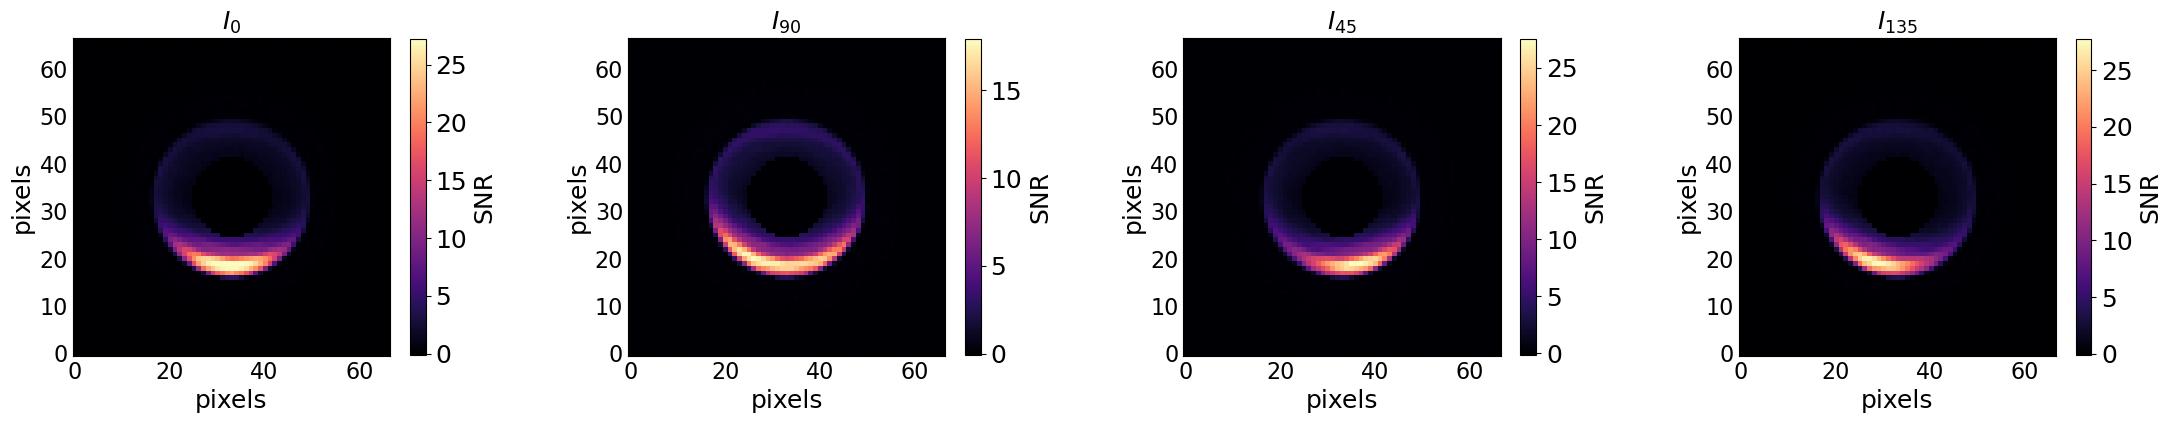

In [9]:
fig = plt.figure(figsize=(25, 10))
ax1=fig.add_subplot(141)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
im1=ax1.imshow(SNR_0,cmap='magma')
ax1.invert_yaxis()
ax1.set_ylabel('pixels',fontsize=18)
ax1.set_xlabel('pixels',fontsize=18)
ax1.set_title('$I_0$',fontsize=18)
cb = fig.colorbar(im1,orientation='vertical',shrink=0.4)
cb.set_label("SNR",fontsize=18)
cb.ax.tick_params(labelsize=18)

ax2=fig.add_subplot(142)
ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')
ax2.minorticks_on()
ax2.tick_params(which='both', direction='in', width=0.5, labelsize=16)
im2=ax2.imshow(SNR_90,cmap='magma')
ax2.invert_yaxis()
ax2.set_ylabel('pixels',fontsize=18)
ax2.set_xlabel('pixels',fontsize=18)
ax2.set_title('$I_{90}$',fontsize=18)
cb = fig.colorbar(im2,orientation='vertical',shrink=0.4)
cb.set_label("SNR",fontsize=18)
cb.ax.tick_params(labelsize=18)
        
ax3=fig.add_subplot(143)
ax3.yaxis.set_ticks_position('both')
ax3.xaxis.set_ticks_position('both')
ax3.minorticks_on()
ax3.tick_params(which='both', direction='in', width=0.5, labelsize=16)
im3=ax3.imshow(SNR_45,cmap='magma')
ax3.invert_yaxis()
ax3.set_ylabel('pixels',fontsize=18)
ax3.set_xlabel('pixels',fontsize=18)
ax3.set_title('$I_{45}$',fontsize=18)
cb = fig.colorbar(im3,orientation='vertical',shrink=0.4)
cb.set_label("SNR",fontsize=18)
cb.ax.tick_params(labelsize=18)

ax4=fig.add_subplot(144)
ax4.yaxis.set_ticks_position('both')
ax4.xaxis.set_ticks_position('both')
ax4.minorticks_on()
ax4.tick_params(which='both', direction='in', width=0.5, labelsize=16)
im4=ax4.imshow(SNR_135,cmap='magma')
ax4.invert_yaxis()
ax4.set_ylabel('pixels',fontsize=18)
ax4.set_xlabel('pixels',fontsize=18)
ax4.set_title('$I_{135}$',fontsize=18)
cb = fig.colorbar(im4,orientation='vertical',shrink=0.4)
cb.set_label("SNR",fontsize=18)
cb.ax.tick_params(labelsize=18)
    
fig.subplots_adjust(hspace=0.1, wspace=0.4, top=0.9, right=0.95)
#fig.savefig(disk_file_dir+'SNR_disks_NMF.pdf', format='pdf', bbox_inches='tight')

In [10]:
Q_out=(med_wd_noNMF_0.astype(np.float64)-med_wd_noNMF_90.astype(np.float64))
U_out=(med_wd_noNMF_45.astype(np.float64)-med_wd_noNMF_135.astype(np.float64))
I_out=(med_wd_noNMF_0.astype(np.float64)+med_wd_noNMF_90.astype(np.float64))


Q_out[np.isnan(Q_out)]=0
U_out[np.isnan(U_out)]=0
I_out[np.isnan(I_out)]=0


In [12]:
q=Q_out/I_out
u=U_out/I_out
p=np.sqrt(q*q+u*u)
p[p>0.93]=0
np.nanmax(p)

/var/folders/tz/b2jsht6d7nv7db1v7bt3645c0000gn/T/ipykernel_20133/2969594184.py:1: RuntimeWarning: invalid value encountered in true_divide
  q=Q_out/I_out
/var/folders/tz/b2jsht6d7nv7db1v7bt3645c0000gn/T/ipykernel_20133/2969594184.py:2: RuntimeWarning: invalid value encountered in true_divide
  u=U_out/I_out


0.8978133453260991

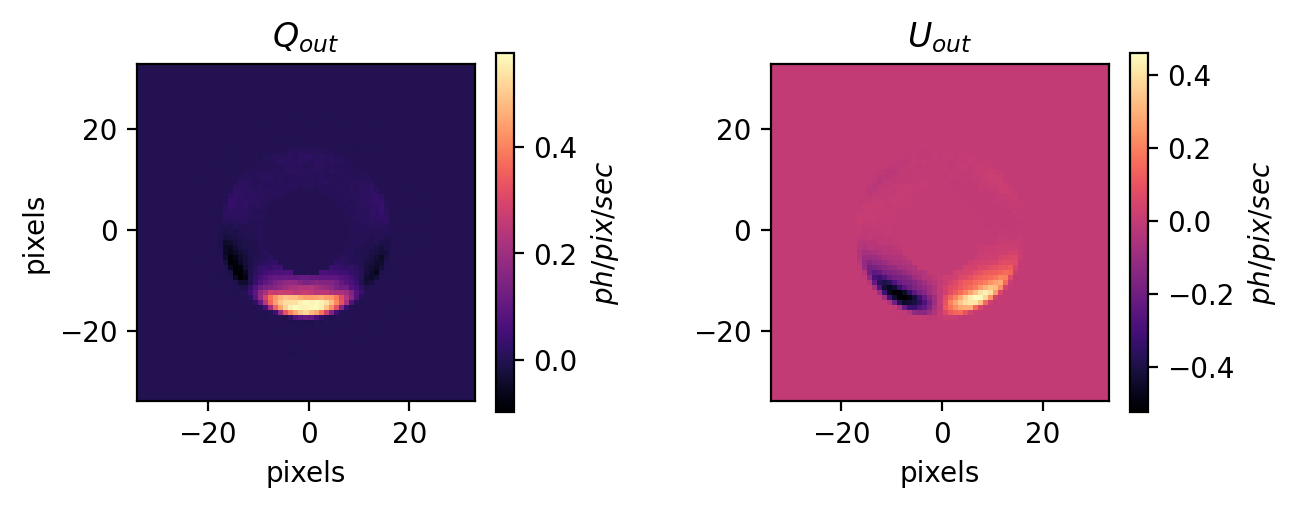

In [13]:
px=67
psf_scale=0.02184 ##arcsecs/pixel
xpix=(np.arange (-px+33, px-33, 1))
ypix=(np.arange (-px+33, px-33, 1))

fig = plt.figure(dpi=200)
ax1=fig.add_subplot(121)
im1=ax1.imshow(Q_out,cmap='magma',extent=[np.min(ypix),np.max(ypix),np.max(xpix),np.min(xpix)])
ax1.invert_yaxis()
ax1.set_ylabel('pixels')
ax1.set_xlabel('pixels')
ax1.set_title('$Q_{out}$', fontsize=12)
cb = fig.colorbar(im1,orientation='vertical',shrink=0.42)
cb.set_label('$ph/pix/sec$')
ax1.grid(False)

ax2=fig.add_subplot(122)
im2=ax2.imshow(U_out,cmap='magma',extent=[np.min(ypix),np.max(ypix),np.max(xpix),np.min(xpix)])
ax2.invert_yaxis()
#ax2.set_ylabel('pixels')
ax2.set_xlabel('pixels')
ax2.set_title('$U_{out}$',fontsize=12)
cb = fig.colorbar(im2,orientation='vertical',shrink=0.42)
cb.set_label('$ph/pix/sec$')
ax2.grid(False)

#ax2=fig.add_subplot(223)
#im2=ax2.imshow(Q_out1,cmap='magma',extent=[np.min(ypix),np.max(ypix),np.max(xpix),np.min(xpix)])
#ax2.invert_yaxis()
#ax2.set_ylabel('pixels')
#ax2.set_xlabel('pixels')
#ax2.set_title('Q-NMF speckle subtraction',fontsize=8)
#cb = fig.colorbar(im2,orientation='vertical',shrink=0.5)
#cb.set_label('$ph/pix/sec$')
#ax2.grid(False)

#ax2=fig.add_subplot(224)
#im2=ax2.imshow(U_out1,cmap='magma',extent=[np.min(ypix),np.max(ypix),np.max(xpix),np.min(xpix)])
#ax2.invert_yaxis()
#ax2.set_ylabel('pixels')
#ax2.set_xlabel('pixels')
#ax2.set_title('U-NMF speckle subtraction',fontsize=8)
#cb = fig.colorbar(im2,orientation='vertical',shrink=0.5)
#cb.set_label('$ph/pix/sec$')
#ax2.grid(False)
#fig.suptitle('Stokes parameters $Q$ and $U$ with carbon',fontsize=10)
fig.subplots_adjust(hspace=0.9, wspace=0.5, top=1, right=0.95)
#fig.savefig(disk_file_dir+'Stokes_output.pdf', format='pdf', bbox_inches='tight')

In [14]:
np.seterr(invalid='ignore')
xarc=(np.arange (-px+33, px-34, 1))*psf_scale
yarc=(np.arange (-px+34, px-34, 1))*psf_scale
sq_as_per_pix=psf_scale**2
A=2.5*np.log10(sq_as_per_pix)
C=16.116260479999998 

X, Y = np.mgrid[(0):(67):67j, (0):(67):67j]
positions = np.vstack([X.ravel(), Y.ravel()])
pos=np.transpose(positions)

Phi=np.arctan((pos[:,0]-33)/(pos[:,1]-34))
Phi_new=np.reshape(Phi,(67,67))


# the Mueller matrix has the - sign because of the retarder since that is incorporated, the expressions of Q_phi and U_phi
# had to be changed to make sure we get positive polarization fraction and Q_phi and negligible U_phi

Q_cor=-0.99*Q_out+0.99e-06*U_out
U_cor=0.994758322*U_out


Q_phi=Q_cor*np.cos(2*Phi_new)-U_cor*np.sin(2*Phi_new)
U_phi=-Q_cor*np.sin(2*Phi_new)-U_cor*np.cos(2*Phi_new)

# calculating instrumental magnitudes -2.5log10(ct/s)+ZP+2.5log10(Area)
Q_mag=-2.5*np.log10(Q_phi)+A+C
U_mag=-2.5*np.log10(U_phi)+A+C
I_mag=-2.5*np.log10(I_out)+A+C

# calculating flux
Q_flux=10**(-0.4*Q_mag)*10**3
U_flux=10**(-0.4*U_mag)*10**3
I_flux=10**(-0.4*I_mag)*10**3



p_r=np.abs(Q_flux/I_flux)
theta=0.5*np.arctan2(U_out,Q_out)


Q_flux[np.isnan(Q_flux)]=0
U_flux[np.isnan(U_flux)]=0
p_r[np.isnan(p_r)]=0
I_flux[np.isnan(I_flux)]=0
theta[np.isnan(theta)]=0
np.max(p_r)


/var/folders/tz/b2jsht6d7nv7db1v7bt3645c0000gn/T/ipykernel_20133/4166314879.py:27: RuntimeWarning: divide by zero encountered in log10
  Q_mag=-2.5*np.log10(Q_phi)+A+C
/var/folders/tz/b2jsht6d7nv7db1v7bt3645c0000gn/T/ipykernel_20133/4166314879.py:28: RuntimeWarning: divide by zero encountered in log10
  U_mag=-2.5*np.log10(U_phi)+A+C
/var/folders/tz/b2jsht6d7nv7db1v7bt3645c0000gn/T/ipykernel_20133/4166314879.py:29: RuntimeWarning: divide by zero encountered in log10
  I_mag=-2.5*np.log10(I_out)+A+C


0.3836003698738989

In [57]:
np.nanmax(I_flux)

1.4259309615166789

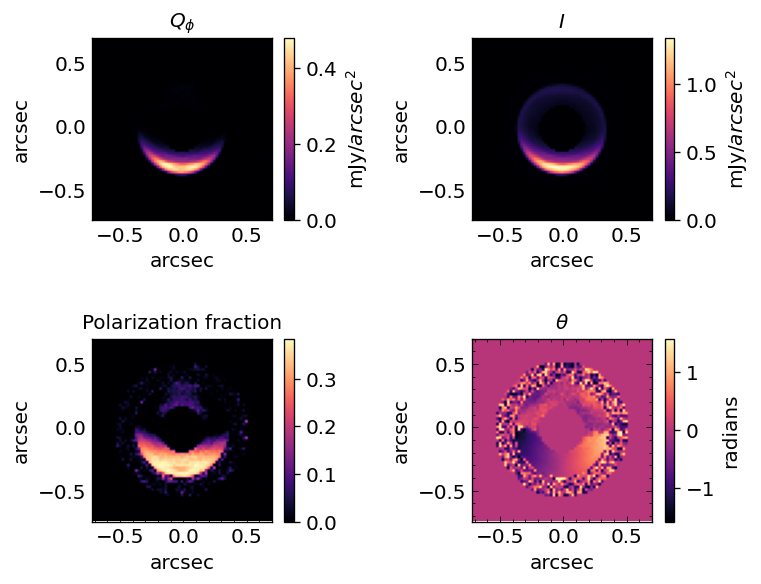

In [113]:
fig = plt.figure(dpi=120)
ax1=fig.add_subplot(221)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=12)
im1=ax1.imshow(Q_flux,cmap='magma',extent=[np.min(yarc),np.max(yarc),np.max(xarc),np.min(xarc)])
ax1.invert_yaxis()
ax1.set_ylabel('arcsec',fontsize=12)
ax1.set_xlabel('arcsec',fontsize=12)
ax1.set_title(r'$Q_{\phi}$',fontsize=12)
cb = fig.colorbar(im1,orientation='vertical')
cb.set_label(u"mJy/$arcsec^2$",fontsize=12)
cb.ax.tick_params(labelsize=12)


ax2=fig.add_subplot(222)
ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')
ax2.minorticks_on()
ax2.tick_params(which='both', direction='in', width=0.5, labelsize=12)
im2=ax2.imshow(I_flux,cmap='magma',extent=[np.min(yarc),np.max(yarc),np.max(xarc),np.min(xarc)])
ax2.invert_yaxis()
ax2.set_ylabel('arcsec',fontsize=12)
ax2.set_xlabel('arcsec',fontsize=12)
ax2.set_title(r'$I$',fontsize=12)
cb = fig.colorbar(im2,orientation='vertical')
cb.set_label(u"mJy/$arcsec^2$",fontsize=12)
cb.ax.tick_params(labelsize=12)


ax2=fig.add_subplot(223)
ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')
ax2.minorticks_on()
ax2.tick_params(which='both', direction='in', width=0.5, labelsize=12)
im2=ax2.imshow(p_r,cmap='magma',extent=[np.min(yarc),np.max(yarc),np.max(xarc),np.min(xarc)])
ax2.invert_yaxis()
ax2.set_ylabel('arcsec',fontsize=12)
ax2.set_xlabel('arcsec',fontsize=12)
ax2.set_title('Polarization fraction',fontsize=12)
cb = fig.colorbar(im2,orientation='vertical')
cb.ax.tick_params(labelsize=12)
#cb.set_label('p',fontsize=12)


ax2=fig.add_subplot(224)
ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')
ax2.minorticks_on()
ax2.tick_params(which='both', direction='in', width=0.5, labelsize=12)
im2=ax2.imshow(theta,cmap='magma',extent=[np.min(yarc),np.max(yarc),np.max(xarc),np.min(xarc)])
ax2.invert_yaxis()
ax2.set_ylabel('arcsec',fontsize=12)
ax2.set_xlabel('arcsec',fontsize=12)
ax2.set_title(r'$\theta$',fontsize=12)
cb = fig.colorbar(im2,orientation='vertical')
cb.set_label('radians',fontsize=12)
cb.ax.tick_params(labelsize=12)


fig.subplots_adjust(hspace=0.65, wspace=0.5, top=0.95, right=0.95)
fig.savefig(figure_dir+'Final_Stokes_epseri.pdf', format='pdf', bbox_inches='tight')

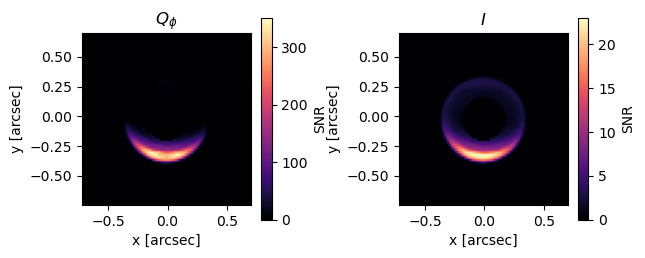

In [20]:
positions = [(34., 51.), (18., 45.),(50., 38.)]
aper = CircularAperture(positions, r=5.)

aperstats = ApertureStats(Q_flux, aper)
noise_Q=np.mean(aperstats.std)
SNR_Q=Q_flux.astype(np.float64)/noise_Q

aperstats = ApertureStats(I_flux, aper)
noise_I=np.mean(aperstats.std)
SNR_I=I_flux.astype(np.float64)/noise_I

fig = plt.figure(dpi=100)
ax1=fig.add_subplot(121)
im1=ax1.imshow(SNR_Q,cmap='magma',extent=[np.min(yarc),np.max(yarc),np.max(xarc),np.min(xarc)])
ax1.invert_yaxis()
ax1.set_ylabel('y [arcsec]')
ax1.set_xlabel('x [arcsec]')
ax1.set_title(r'$Q_{\phi}$')
cb = fig.colorbar(im1,orientation='vertical',shrink=0.5)
cb.set_label('SNR')
ax1.grid(False)

ax2=fig.add_subplot(122)
im2=ax2.imshow(SNR_I,cmap='magma',extent=[np.min(yarc),np.max(yarc),np.max(xarc),np.min(xarc)])
ax2.invert_yaxis()
ax2.set_ylabel('y [arcsec]')
ax2.set_xlabel('x [arcsec]')
ax2.set_title(r'$I$')
cb = fig.colorbar(im2,orientation='vertical',shrink=0.5)
cb.set_label('SNR')
ax2.grid(False)
fig.subplots_adjust(hspace=0.65, wspace=0.5, top=0.95, right=0.95)

In [955]:
hdu = fits.PrimaryHDU(I_flux.astype(np.float64))
hdul = fits.HDUList([hdu])
hdul.writeto(disk_file_dir+'I_flux_band.fits',overwrite=True)
hdu = fits.PrimaryHDU(Q_flux.astype(np.float64))
hdul = fits.HDUList([hdu])
hdul.writeto(disk_file_dir+'Q_flux_band.fits',overwrite=True)
hdu = fits.PrimaryHDU(U_flux.astype(np.float64))
hdul = fits.HDUList([hdu])
hdul.writeto(disk_file_dir+'U_flux_band.fits',overwrite=True)
hdu = fits.PrimaryHDU(p_r.astype(np.float64))
hdul = fits.HDUList([hdu])
hdul.writeto(disk_file_dir+'pout_band.fits',overwrite=True)

In [96]:
y, x = np.indices(Q_flux.shape)     # 0.0665AU/pixel
center = np.array([(x.max()-x.min())/2.0, (y.max()-y.min())/2.0])
qx, qy=np.unravel_index(np.argmax(Q_flux), Q_flux.shape)
ix, iy=np.unravel_index(np.argmax(I_flux), I_flux.shape)
prx, pry =np.unravel_index(np.argmax(p), p.shape)
        
npix=1
    
Q_flux_lin=np.mean(Q_flux[qx-npix:qx+npix,:],axis=0)
I_flux_lin=np.mean(I_flux[qx-npix:qx+npix,:],axis=0)
p_r_lin   =np.mean(p_r[prx-npix:prx+npix,:],axis=0)

Q_flux_err=np.mean(np.std(Q_flux[qx-npix:qx+npix,:],axis=0))
I_flux_err=np.mean(np.std(I_flux[qx-npix:qx+npix,:],axis=0))
p_r_err  =np.mean(np.std(p_r[qx-npix:qx+npix,:],axis=0))

In [97]:
prx, pry =np.unravel_index(np.argmax(p_r), p.shape)
prx,pry

(18, 28)

In [98]:
np.nanmax(p_r)

0.38360036987389884

In [115]:
np.max(p_r_lin)

0.38360036987389884

In [116]:
p_r_err

0.012170047196964453

In [117]:
np.max(Q_flux)

0.47991785161658085

In [42]:
Q_flux_err

0.015032365894707177

In [118]:
np.max(I_flux_lin)

1.3737927195956892

In [981]:
np.max(I_flux)

0.36562285440990117

In [101]:
qx, qy=np.unravel_index(np.argmax(Q_flux), Q_flux.shape)
q_max=Q_flux[qx-1:qx+2,qy-1:qy+2]
i_max=I_flux[qx-1:qx+2,qy-1:qy+2]

In [114]:
I_flux.max()

1.344009239229642

In [106]:
p_r_lin=p_r[prx-1:prx+2,pry-1:pry+2]
p_r_lin

array([[0.34076341, 0.37373346, 0.37118195],
       [0.37470134, 0.38360037, 0.37138815],
       [0.36646423, 0.36346053, 0.35395064]])

In [107]:
np.mean(p_r_lin)

0.3665826761723095

In [108]:
np.std(p_r_lin)

0.011957605759647777

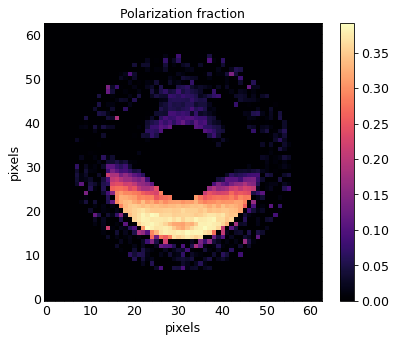

In [86]:
p_new=p_r[2:65,2:65]

fig = plt.figure(dpi=75)
ax2=fig.add_subplot(111)
ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')
ax2.minorticks_on()
ax2.tick_params(which='both', direction='in', width=0.5, labelsize=12)
im2=ax2.imshow(p_new,cmap='magma')
ax2.invert_yaxis()
ax2.set_ylabel('pixels',fontsize=12)
ax2.set_xlabel('pixels',fontsize=12)
ax2.set_title('Polarization fraction',fontsize=12)
cb = fig.colorbar(im2,orientation='vertical')
cb.ax.tick_params(labelsize=12)

In [85]:
prx, pry =np.unravel_index(np.argmax(p_new), p.shape)
prx,pry

(2, 47)